<a href="https://colab.research.google.com/github/Hunter-R-S/MAT494/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAT 494 - HW5 - Probability**

The following are examples of probabilistic distribution that come from QuantEcon. Let's begin.

Standard imports plus some new ones to better analyze probabilistic distributions:

In [3]:
import numpy as np
import pandas as pd
import prettytable as pt
import matplotlib.pyplot as plt
from scipy.stats import binom
import scipy.stats as st
%matplotlib inline

## **Frequentist Interpretation**

In [1]:
class frequentist:

    def __init__(self, θ, n, I):
    
        '''
        initialization
        -----------------
        parameters:
        θ : probability that one toss of a coin will be a head with Y = 1
        n : number of independent flips in each independent sequence of draws
        I : number of independent sequence of draws
        
        '''
        
        self.θ, self.n, self.I = θ, n, I
    
    def binomial(self, k):
        
        '''compute the theoretical probability for specific input k'''
        
        θ, n = self.θ, self.n
        self.k = k
        self.P = binom.pmf(k, n, θ)
        
    def draw(self):
        
        '''draw n independent flips for I independent sequences'''
        
        θ, n, I = self.θ, self.n, self.I
        sample = np.random.rand(I, n)
        Y = (sample <= θ) * 1
        self.Y = Y
    
    def compute_fk(self, kk):
        
        '''compute f_{k}^I for specific input k'''
        
        Y, I = self.Y, self.I
        K = np.sum(Y, 1)
        f_kI = np.sum(K == kk) / I
        self.f_kI = f_kI
        self.kk = kk
        
    def compare(self):
        
        '''compute and print the comparison'''
        
        n = self.n
        comp = pt.PrettyTable()
        comp.field_names = ['k', 'Theoretical', 'Frequentist']
        self.draw()
        for i in range(n):
            self.binomial(i+1)
            self.compute_fk(i+1)
            comp.add_row([i+1, self.P, self.f_kI])
        print(comp)

In [4]:
θ, n, k, I = 0.7, 20, 10, 1_000_000

freq = frequentist(θ, n, I)

freq.compare()

+----+------------------------+-------------+
| k  |      Theoretical       | Frequentist |
+----+------------------------+-------------+
| 1  | 1.6271660538000033e-09 |     0.0     |
| 2  | 3.606884752589999e-08  |     0.0     |
| 3  |  5.04963865362601e-07  |     0.0     |
| 4  | 5.007558331512455e-06  |    3e-06    |
| 5  | 3.7389768875293014e-05 |   4.4e-05   |
| 6  | 0.00021810698510587546 |   0.000212  |
| 7  |  0.001017832597160754  |   0.001022  |
| 8  |  0.003859281930901185  |   0.00375   |
| 9  |  0.012006654896137007  |   0.011914  |
| 10 |  0.030817080900085007  |   0.030802  |
| 11 |   0.065369565545635    |   0.06579   |
| 12 |  0.11439673970486108   |   0.114322  |
| 13 |   0.1642619852172365   |   0.163845  |
| 14 |  0.19163898275344246   |   0.191896  |
| 15 |  0.17886305056987967   |   0.178703  |
| 16 |   0.1304209743738704   |   0.130548  |
| 17 |  0.07160367220526209   |   0.07159   |
| 18 |  0.027845872524268643  |   0.027793  |
| 19 |  0.006839337111223871  |   

Now we can plot outcomes for different theta:

In [5]:
θ_low, θ_high, npt = 0.01, 0.99, 50
thetas = np.linspace(θ_low, θ_high, npt)
P = []
f_kI = []
for i in range(npt):
    freq = frequentist(thetas[i], n, I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

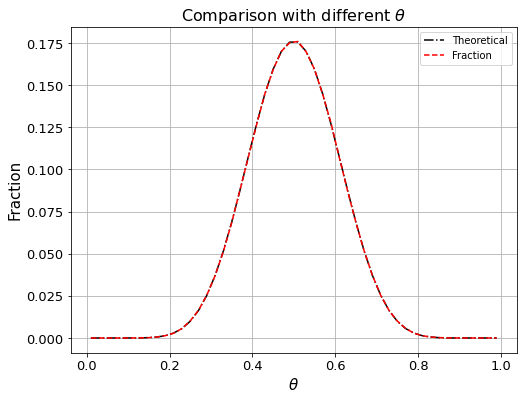

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(thetas, P, 'k-.', label='Theoretical')
ax.plot(thetas, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $\theta$', fontsize=16)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

We can also compare across *n* and *I*.

In [7]:
n_low, n_high, nn = 1, 100, 50
ns = np.linspace(n_low, n_high, nn, dtype='int')
P = []
f_kI = []
for i in range(nn):
    freq = frequentist(θ, ns[i], I)
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

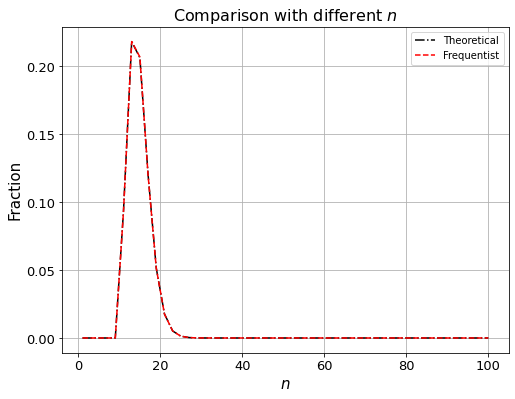

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(ns, P, 'k-.', label='Theoretical')
ax.plot(ns, f_kI, 'r--', label='Frequentist')
plt.title(r'Comparison with different $n$', fontsize=16)
plt.xlabel(r'$n$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()

In [9]:
I_log_low, I_log_high, nI = 2, 6, 200
log_Is = np.linspace(I_log_low, I_log_high, nI)
Is = np.power(10, log_Is).astype(int)
P = []
f_kI = []
for i in range(nI):
    freq = frequentist(θ, n, Is[i])
    freq.binomial(k)
    freq.draw()
    freq.compute_fk(k)
    P.append(freq.P)
    f_kI.append(freq.f_kI)

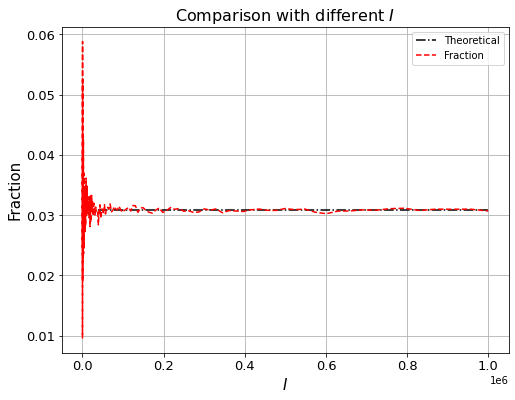

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()
ax.plot(Is, P, 'k-.', label='Theoretical')
ax.plot(Is, f_kI, 'r--', label='Fraction')
plt.title(r'Comparison with different $I$', fontsize=16)
plt.xlabel(r'$I$', fontsize=15)
plt.ylabel('Fraction', fontsize=15)
plt.tick_params(labelsize=13)
plt.legend()
plt.show()